In [60]:
# Import required libraries for analysis.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Read private school dataset.
priv = pd.read_csv('Private_Schools.csv')
print(priv.head())

              X             Y  FID  OBJECTID    NCESID  \
0 -8.136078e+06  5.055506e+06    1      1201  A0507274   
1 -8.147300e+06  5.037067e+06    2      1202  A0500844   
2 -8.197042e+06  5.018050e+06    3      1203  A0108054   
3 -8.171504e+06  5.077291e+06    4      1204  A0507283   
4 -8.197596e+06  5.017131e+06    5      1205  01612613   

                               NAME                   ADDRESS        CITY  \
0                  A CHILD'S GARDEN           20 IVY BROOK RD     SHELTON   
1  BRIDGEPORT INTERNATIONAL ACADEMY  285 LAFAYETTE ST STE 200  BRIDGEPORT   
2                    CARMEL ACADMEY              270 LAKE AVE   GREENWICH   
3                 COUNTRY KIDS CLUB           94 OLD STATE RD  BROOKFIELD   
4                 EAGLE HILL SCHOOL           45 GLENVILLE RD   GREENWICH   

  STATE   ZIP  ...           SOURCEDATE     VAL_METHOD             VAL_DATE  \
0    CT  6484  ...  2010/01/29 00:00:00        IMAGERY  2010/02/25 00:00:00   
1    CT  6604  ...  2010/01/29

In [62]:
# Read public school dataset.
pub = pd.read_csv('Public_Schools.csv')
print(pub.head())

              X             Y  OBJECTID        NCESID  \
0 -9.844095e+06  5.230976e+06         1  170330000017   
1 -9.007027e+06  4.195442e+06         2  370297001287   
2 -9.580426e+06  4.792069e+06         3  180369000584   
3 -1.243297e+07  3.927588e+06         4   40187003479   
4 -1.243258e+07  3.924831e+06         5   40187003483   

                                            NAME             ADDRESS  \
0                       ALDEN-HEBRON HIGH SCHOOL    9604 ILLINOIS ST   
1                         WESTERLY HILLS ACADEMY     4420 DENVER AVE   
2                    NORTHWOOD ELEMENTARY SCHOOL  965 GRIZZLY CUB DR   
3  DR. GARY AND ANNETTE AUXIER ELEMENTARY SCHOOL  22700 S. POWER RD.   
4                DR. CAMILLE CASTEEL HIGH SCHOOL  24901 S. POWER RD.   

          CITY STATE    ZIP           ZIP4  ...     VAL_METHOD  \
0       HEBRON    IL  60034           9618  ...  IMAGERY/OTHER   
1    CHARLOTTE    NC  28208           3699  ...  IMAGERY/OTHER   
2     FRANKLIN    IN  4613

In [63]:
# Read USA real estate dataset. 
re = pd.read_csv('realtor-data.zip.csv')
print(re.head())

   brokered_by    status     price  bed  bath  acre_lot     street  \
0     103378.0  for_sale  105000.0  3.0   2.0      0.12  1962661.0   
1      52707.0  for_sale   80000.0  4.0   2.0      0.08  1902874.0   
2     103379.0  for_sale   67000.0  2.0   1.0      0.15  1404990.0   
3      31239.0  for_sale  145000.0  4.0   2.0      0.10  1947675.0   
4      34632.0  for_sale   65000.0  6.0   2.0      0.05   331151.0   

         city        state  zip_code  house_size prev_sold_date  
0    Adjuntas  Puerto Rico     601.0       920.0            NaN  
1    Adjuntas  Puerto Rico     601.0      1527.0            NaN  
2  Juana Diaz  Puerto Rico     795.0       748.0            NaN  
3       Ponce  Puerto Rico     731.0      1800.0            NaN  
4    Mayaguez  Puerto Rico     680.0         NaN            NaN  


In [64]:
# Match column names between datasets.
re.rename(columns = {'status':'STATUS', 'price':'PRICE', 'city':'CITY', 'state':'STATE', 'zip_code':'ZIP', 'prev_sold_date':'DATE'}, inplace = True)
priv.rename(columns = {'SOURCEDATE':'DATE'}, inplace = True)
pub.rename(columns = {'SOURCEDATE':'DATE'}, inplace = True)

In [89]:
priv.dropna(subset = ['CITY', 'DATE', 'ZIP', 'ENROLLMENT', 'FT_TEACHER', 'POPULATION'], inplace = True)

pub.dropna(subset = ['CITY', 'DATE', 'ZIP', 'ENROLLMENT', 'FT_TEACHER', 'POPULATION'], inplace = True)

# Drop rows with missing values from CITY, PRICE, DATE, and ZIP since they will be used in analysis.
re.dropna(subset = ['CITY', 'PRICE', 'DATE', 'ZIP', 'STATUS'], inplace = True)
print(re[['DATE']].head())

# Capitalize all letters for cities in CITY column real estate dataset.
re['CITY'] = re['CITY'].str.upper()
print(re[['CITY']].head())

            DATE
411   2020/02/28
502   2019/06/28
1025  2021/09/15
1160  2021/03/15
2270  2013/10/11
              CITY
411      CANOVANAS
502         DORADO
1025        CAGUAS
1160       YABUCOA
2270  SAINT THOMAS


In [66]:
# Format sourcedate column in school datasets to remove unwanted characters (00:00:00).
priv['DATE'] = pd.to_datetime(priv['DATE']).dt.strftime('%Y/%m/%d')
print(priv['DATE'].head())

pub['DATE'] = pd.to_datetime(pub['DATE']).dt.strftime('%Y/%m/%d')
print(pub['DATE'].head())

# Format date column for real estate dataset to match date format of school datasets.
re['DATE'] = pd.to_datetime(re['DATE'], errors = 'coerce').dt.strftime('%Y/%m/%d')
print(re['DATE'].head())

0    2010/01/29
1    2010/01/29
2    2010/01/29
3    2010/01/29
4    2010/01/29
Name: DATE, dtype: object
0    2009/10/13
1    2009/12/10
2    2009/10/13
3    2018/10/23
4    2018/10/23
Name: DATE, dtype: object
411     2020/02/28
502     2019/06/28
1025    2021/09/15
1160    2021/03/15
2270    2013/10/11
Name: DATE, dtype: object


In [67]:
# Check data type for each column.
print(re.dtypes)
print(pub.dtypes)
print(priv.dtypes)

brokered_by    float64
STATUS          object
PRICE          float64
bed            float64
bath           float64
acre_lot       float64
street         float64
CITY            object
STATE           object
ZIP            float64
house_size     float64
DATE            object
dtype: object
X             float64
Y             float64
OBJECTID        int64
NCESID          int64
NAME           object
ADDRESS        object
CITY           object
STATE          object
ZIP             int64
ZIP4           object
TELEPHONE      object
TYPE            int64
STATUS          int64
POPULATION      int64
COUNTY         object
COUNTYFIPS      int64
COUNTRY        object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
SOURCE         object
DATE           object
VAL_METHOD     object
VAL_DATE       object
WEBSITE        object
LEVEL_         object
ENROLLMENT      int64
ST_GRADE       object
END_GRADE      object
DISTRICTID      int64
FT_TEACHER      int64
SHELTE

In [90]:
# Check if any of the coloumns have missing values.
print(priv.isnull().any(axis=0))
print(pub.isnull().any(axis=0))
print(re.isnull().any(axis=0))

X                False
Y                False
FID              False
OBJECTID         False
NCESID           False
NAME             False
ADDRESS          False
CITY             False
STATE            False
ZIP              False
ZIP4             False
TELEPHONE        False
TYPE             False
STATUS           False
POPULATION       False
COUNTY           False
COUNTYFIPS       False
COUNTRY          False
LATITUDE         False
LONGITUDE        False
NAICS_CODE       False
NAICS_DESC       False
SOURCE           False
DATE             False
VAL_METHOD       False
VAL_DATE         False
WEBSITE          False
LEVEL_           False
ENROLLMENT       False
START_GRAD       False
END_GRADE        False
FT_TEACHER       False
SHELTER_ID       False
Priv_ST_Ratio    False
Priv_ER          False
dtype: bool
X               False
Y               False
OBJECTID        False
NCESID          False
NAME            False
ADDRESS          True
CITY            False
STATE           False
ZIP    

In [69]:
# Calculate student-to-teacher ratio for private schools
priv['Priv_ST_Ratio'] = priv['ENROLLMENT'] / priv['FT_TEACHER']

# Remove any inf values
priv['Priv_ST_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove any NaN values
priv.dropna(subset=['Priv_ST_Ratio'], inplace=True)

# Calculate average student-to-teacher ratio for private schools for each city
priv_ST_grouped = priv.groupby('CITY')['Priv_ST_Ratio'].mean().reset_index()

#miami_ratios = priv.loc[pub['CITY'] == 'MIAMI', ['CITY', 'Priv_ST_Ratio']]
#miami_ratios.to_csv('miami_priv_st_ratio.csv', index=False)

# Same process for public schools 
pub['Pub_ST_Ratio'] = pub['ENROLLMENT'] / pub['FT_TEACHER']
pub['Pub_ST_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
pub.dropna(subset=['Pub_ST_Ratio'], inplace=True)
pub_ST_grouped = pub.groupby('CITY')['Pub_ST_Ratio'].mean().reset_index()

In [70]:
# Calculate enrollment rate for private schools
priv['Priv_ER'] = priv['ENROLLMENT'] / priv['POPULATION']

# Remove any inf values
priv['Priv_ER'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove any NaN values
priv.dropna(subset=['Priv_ER'], inplace=True)

# Remove any negative values
priv = priv[priv['Priv_ER'] >= 0]

# Calculate average enrollment rate for private schools for each city
priv_ER_grouped = priv.groupby('CITY')['Priv_ER'].mean().reset_index()

# Same process for public schools 
pub['Pub_ER'] = pub['ENROLLMENT'] / pub['POPULATION']
pub['Pub_ER'].replace([np.inf, -np.inf], np.nan, inplace=True)
pub.dropna(subset=['Pub_ER'], inplace=True)
pub = pub[pub['Pub_ER'] >= 0]

#tampa_er = pub.loc[pub['CITY'] == 'TAMPA', ['CITY', 'Pub_ER']]
#tampa_er.to_csv('tampa_pub_er.csv', index=False)

pub_ER_grouped = pub.groupby('CITY')['Pub_ER'].mean().reset_index()

In [71]:
# Ranking the count of each city in each dataset to see which cities have the most data. 
# Cities with more data means more accurate estimates and therefore more accurate analysis.
# Therefore top 50 cities by count will be used in analysis.

city_priv_counts = priv['CITY'].value_counts()
ranked_priv_counts = city_priv_counts.rank(ascending = False, method = 'dense')
ranked_priv = pd.DataFrame({
    'CITY': city_priv_counts.index,
    'Count': city_priv_counts.values,
    'Rank': ranked_priv_counts.values
})

city_pub_counts = pub['CITY'].value_counts()
ranked_pub_counts = city_pub_counts.rank(ascending = False, method = 'dense')
ranked_pub = pd.DataFrame({
    'CITY': city_pub_counts.index,
    'Count': city_pub_counts.values,
    'Rank': ranked_pub_counts.values
})

city_re_counts = re['CITY'].value_counts()
ranked_re_counts = city_re_counts.rank(ascending = False, method = 'dense')
ranked_re = pd.DataFrame({
    'CITY': city_re_counts.index,
    'Count': city_re_counts.values,
    'Rank': ranked_re_counts.values
})

top_50_priv = ranked_priv.head(50)
#top_50_priv

top_50_pub = ranked_pub.head(50)
#top_50_pub

top_50_re = ranked_re.head(50)
#print(top_50)

# Merge top 50 cities by count for each dataset into a new dataframe.
top_50 = pd.concat([top_50_priv, top_50_pub, top_50_re], axis = 1)
top_50

,CITY,Count,Rank,CITY,Count,Rank,CITY,Count,Rank
0,BROOKLYN,398,1.0,HOUSTON,803,1.0,HOUSTON,18373,1.0
1,CHICAGO,361,2.0,CHICAGO,685,2.0,CHICAGO,14442,2.0
2,LOS ANGELES,251,3.0,LOS ANGELES,588,3.0,JACKSONVILLE,9303,3.0
3,HOUSTON,231,4.0,BROOKLYN,587,4.0,TUCSON,8286,4.0
4,MIAMI,223,5.0,SAN ANTONIO,521,5.0,NEW YORK CITY,8045,5.0
5,PHILADELPHIA,222,6.0,PHOENIX,456,6.0,LOS ANGELES,7913,6.0
6,NEW YORK,183,7.0,BRONX,449,7.0,PHOENIX,7682,7.0
7,JACKSONVILLE,153,8.0,DALLAS,420,8.0,PHILADELPHIA,7608,8.0
8,BALTIMORE,135,9.0,NEW YORK,360,9.0,DALLAS,7411,9.0
9,SAINT LOUIS,132,10.0,COLUMBUS,329,10.0,MIAMI,7367,10.0


In [72]:
common_cities = set(top_50_priv["CITY"]).intersection(set(top_50_pub["CITY"]), set(top_50_re["CITY"]))

common_cities_df = pd.DataFrame({"CITY": list(common_cities)})
common_cities_df

,CITY
0,SAN JOSE
1,SAN DIEGO
2,TAMPA
3,TUCSON
4,PHOENIX
5,ALBUQUERQUE
6,MIAMI
7,BROOKLYN
8,PORTLAND
9,JACKSONVILLE


In [73]:
merged_ratios = pd.merge(common_cities_df, priv_ST_grouped, on='CITY', how='left', suffixes=('_Private', '_Public'))
merged_ratios = pd.merge(merged_ratios, pub_ST_grouped, on='CITY', how='left', suffixes=('', '_Public'))

# Rename columns
merged_ratios.rename(columns={'ST_Ratio': 'ST_Ratio_Priv',
                              'ST_Ratio_Pub': 'ST_Ratio_Pub'}, inplace=True)

# Display the final DataFrame
display(merged_ratios)

,CITY,Priv_ST_Ratio,Pub_ST_Ratio
0,SAN JOSE,10.872981,23.583202
1,SAN DIEGO,13.881214,22.600727
2,TAMPA,9.191074,8.074740
3,TUCSON,8.978703,10.162559
4,PHOENIX,9.813555,9.969344
5,ALBUQUERQUE,9.605964,14.894996
6,MIAMI,10.004892,12.284408
7,BROOKLYN,10.233417,13.245834
8,PORTLAND,11.895608,16.700233
9,JACKSONVILLE,10.081360,28.807867


In [74]:
# Calculate the average home price in each city.
re_grouped = re.groupby('CITY')['PRICE'].mean().reset_index()

# Merge the average home price with the merged_ratio dataframe on CITY
price_ratios = pd.merge(merged_ratios, re_grouped, on='CITY', how='left')

display(price_ratios)

,CITY,Priv_ST_Ratio,Pub_ST_Ratio,PRICE
0,SAN JOSE,10.872981,23.583202,1.278605e+06
1,SAN DIEGO,13.881214,22.600727,1.081352e+06
2,TAMPA,9.191074,8.074740,5.214220e+05
3,TUCSON,8.978703,10.162559,3.705389e+05
4,PHOENIX,9.813555,9.969344,5.347746e+05
5,ALBUQUERQUE,9.605964,14.894996,3.305290e+05
6,MIAMI,10.004892,12.284408,8.454074e+05
7,BROOKLYN,10.233417,13.245834,9.626272e+05
8,PORTLAND,11.895608,16.700233,6.195959e+05
9,JACKSONVILLE,10.081360,28.807867,3.037514e+05


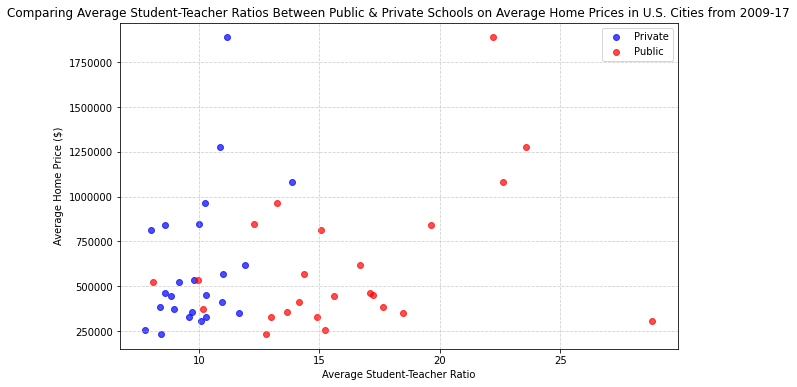

In [116]:
# Extract data from price_ratios dataframe
city = price_ratios["CITY"]
priv_st_ratio = price_ratios["Priv_ST_Ratio"]
pub_st_ratio = price_ratios["Pub_ST_Ratio"]
price = price_ratios["PRICE"]

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot Private School Student-Teacher Ratios
plt.scatter(priv_st_ratio, price, color='blue', label='Private', alpha=0.7)

# Plot Public School Student-Teacher Ratios
plt.scatter(pub_st_ratio, price, color='red', label='Public', alpha=0.7)

# Label and format the plot
plt.xlabel("Average Student-Teacher Ratio")
plt.ylabel("Average Home Price ($)")
plt.title("Comparing Average Student-Teacher Ratios Between Public & Private Schools on Average Home Prices in U.S. Cities from 2009-17")

# Format y-axis values to remove scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Add grid lines
plt.grid(True, linestyle="--", alpha=0.6)

# Add legend
plt.legend()

# Save the figure as a PNG file
plt.savefig("homes_sold_vs_enrollment_rate.png", dpi=300, bbox_inches="tight", facecolor="white")

# Show the plot
plt.show()

In [76]:
# Summary statistics for key metrics of private schools.
priv_summary_stats = priv[['POPULATION', 'ENROLLMENT', 'FT_TEACHER']].describe()
print(priv_summary_stats)

# Summary statistics for key metrics of public schools.
pub_summary_stats = pub[['POPULATION', 'ENROLLMENT', 'FT_TEACHER']].describe()
print(pub_summary_stats)

# Summary statistics for key metrics of USA real estate. 
re_summary_stats = re[['PRICE', 'house_size']].describe()
print(re_summary_stats)

         POPULATION    ENROLLMENT    FT_TEACHER
count  31050.000000  31050.000000  31050.000000
mean     156.242802    142.446151     13.796651
std      236.380413    218.927672     19.855825
min        2.000000      1.000000      1.000000
25%       23.000000     20.000000      3.000000
50%       71.000000     63.000000      8.000000
75%      199.000000    182.000000     16.000000
max     6446.000000   5840.000000    606.000000
          POPULATION     ENROLLMENT     FT_TEACHER
count  100493.000000  100493.000000  100493.000000
mean      498.634810     474.053775     -37.003403
std       549.094724     515.221378     260.964737
min      -999.000000    -999.000000    -999.000000
25%       247.000000     230.000000      15.000000
50%       454.000000     427.000000      26.000000
75%       686.000000     647.000000      40.000000
max     14672.000000   14286.000000    1419.000000
              PRICE    house_size
count  1.491219e+06  1.268599e+06
mean   5.400705e+05  2.021717e+03
std    

In [77]:
price_ER = pd.merge(price_ratios, priv_ER_grouped, on='CITY', how='left')
price_ER = pd.merge(price_ER, pub_ER_grouped, on='CITY', how='left')

display(price_ER)

,CITY,Priv_ST_Ratio,Pub_ST_Ratio,PRICE,Priv_ER,Pub_ER
0,SAN JOSE,10.872981,23.583202,1.278605e+06,0.882946,0.946407
1,SAN DIEGO,13.881214,22.600727,1.081352e+06,0.865288,0.952564
2,TAMPA,9.191074,8.074740,5.214220e+05,0.870587,0.918729
3,TUCSON,8.978703,10.162559,3.705389e+05,0.865980,0.853151
4,PHOENIX,9.813555,9.969344,5.347746e+05,0.858089,0.920004
5,ALBUQUERQUE,9.605964,14.894996,3.305290e+05,0.851338,0.933869
6,MIAMI,10.004892,12.284408,8.454074e+05,0.865276,0.904143
7,BROOKLYN,10.233417,13.245834,9.626272e+05,0.874583,0.926955
8,PORTLAND,11.895608,16.700233,6.195959e+05,0.884556,0.944634
9,JACKSONVILLE,10.081360,28.807867,3.037514e+05,0.877314,0.927436


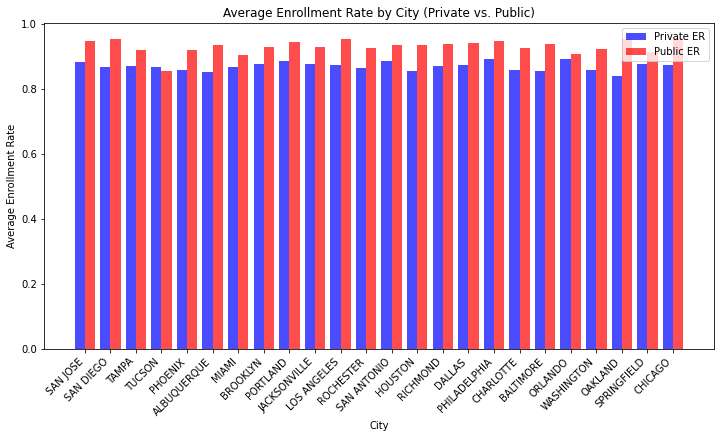

In [120]:
# Extract data from price_ratios dataframe
city = price_ER["CITY"]
priv_er = price_ER["Priv_ER"]
pub_er = price_ER["Pub_ER"]
price = price_ER["PRICE"]

# Set up bar positions
x = np.arange(len(city))  # The label locations
width = 0.4  # Width of the bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bar1 = ax.bar(x - width/2, priv_er, width, label="Private ER", color="blue", alpha=0.7)
bar2 = ax.bar(x + width/2, pub_er, width, label="Public ER", color="red", alpha=0.7)

# Set labels and title
ax.set_xlabel("City")
ax.set_ylabel("Average Enrollment Rate")
ax.set_title("Average Enrollment Rate by City (Private vs. Public)")

# Rotate x-axis labels for better readability
ax.set_xticks(x)
ax.set_xticklabels(city, rotation=45, ha="right")

# Format y-axis (PRICE) to remove scientific notation
ax.ticklabel_format(style='plain', axis='y')

# Add legend
ax.legend()

# Save the figure as a PNG file
plt.savefig("enrollment_rate_city.png", dpi=300, bbox_inches="tight", facecolor="white")                      
                        
# Show plot
plt.show()

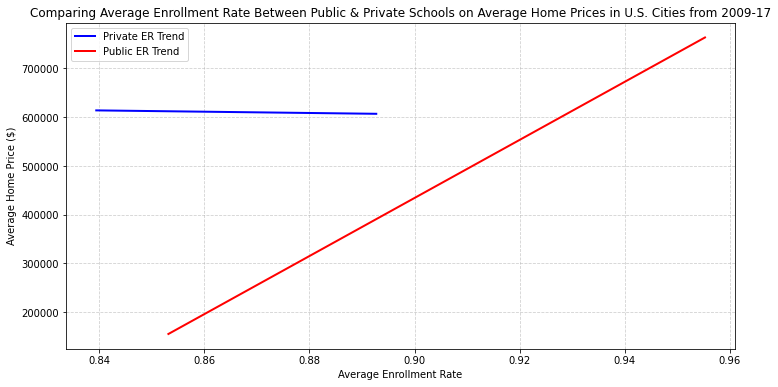

In [121]:
# Perform linear regression for Private Enrollment Rate vs. Home Prices
slope_priv, intercept_priv, _, _, _ = linregress(priv_er, price)

# Perform linear regression for Public Enrollment Rate vs. Home Prices
slope_pub, intercept_pub, _, _, _ = linregress(pub_er, price)

# Generate a smooth range of values for fitting the line
priv_er_range = np.linspace(min(priv_er), max(priv_er), 100)  # 100 points between min & max Priv_ER
pub_er_range = np.linspace(min(pub_er), max(pub_er), 100)  # 100 points between min & max Pub_ER

# Compute predicted prices using the regression equation
priv_fit = slope_priv * priv_er_range + intercept_priv
pub_fit = slope_pub * pub_er_range + intercept_pub

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot only the fitted trend lines for Private and Public Enrollment Rates
ax.plot(priv_er_range, priv_fit, color="blue", linestyle="-", linewidth=2, label="Private ER Trend")
ax.plot(pub_er_range, pub_fit, color="red", linestyle="-", linewidth=2, label="Public ER Trend")

# Set labels and title
ax.set_xlabel("Average Enrollment Rate")
ax.set_ylabel("Average Home Price ($)")
ax.set_title("Comparing Average Enrollment Rate Between Public & Private Schools on Average Home Prices in U.S. Cities from 2009-17")

# Format y-axis to remove scientific notation
ax.ticklabel_format(style='plain', axis='y')

# Add grid
ax.grid(True, linestyle="--", alpha=0.6)

# Add legend
ax.legend()

# Save the figure as a PNG file
plt.savefig("house_price_vs_enrollment_rate.png", dpi=300, bbox_inches="tight", facecolor="white")

# Show plot
plt.show()

In [91]:
# Filter rows where STATUS is 'sold'
sold_homes = re[re['STATUS'].str.lower() == 'sold']

# Count the number of sold homes for each city
homes_sold_per_city = sold_homes.groupby('CITY').size().reset_index(name='Homes_Sold')

# Display the result
print(homes_sold_per_city)

                  CITY  Homes_Sold
0      15TH AVE MILTON           1
1            1ST SAINT           1
2          240TH SAINT           1
3          260TH SAINT           1
4            4TH SAINT           1
...                ...         ...
12733    ZOLFO SPRINGS          15
12734     ZUMBRO FALLS           5
12735         ZUMBROTA          14
12736          ZWINGLE           2
12737           ZWOLLE           8

[12738 rows x 2 columns]


In [94]:
homes_sold_df = pd.merge(price_ER, homes_sold_per_city, on='CITY', how='left')

display(homes_sold_df)

,CITY,Priv_ST_Ratio,Pub_ST_Ratio,PRICE,Priv_ER,Pub_ER,Homes_Sold
0,SAN JOSE,10.872981,23.583202,1.278605e+06,0.882946,0.946407,3553
1,SAN DIEGO,13.881214,22.600727,1.081352e+06,0.865288,0.952564,5050
2,TAMPA,9.191074,8.074740,5.214220e+05,0.870587,0.918729,3400
3,TUCSON,8.978703,10.162559,3.705389e+05,0.865980,0.853151,5968
4,PHOENIX,9.813555,9.969344,5.347746e+05,0.858089,0.920004,4967
5,ALBUQUERQUE,9.605964,14.894996,3.305290e+05,0.851338,0.933869,3278
6,MIAMI,10.004892,12.284408,8.454074e+05,0.865276,0.904143,3568
7,BROOKLYN,10.233417,13.245834,9.626272e+05,0.874583,0.926955,1050
8,PORTLAND,11.895608,16.700233,6.195959e+05,0.884556,0.944634,3549
9,JACKSONVILLE,10.081360,28.807867,3.037514e+05,0.877314,0.927436,5785


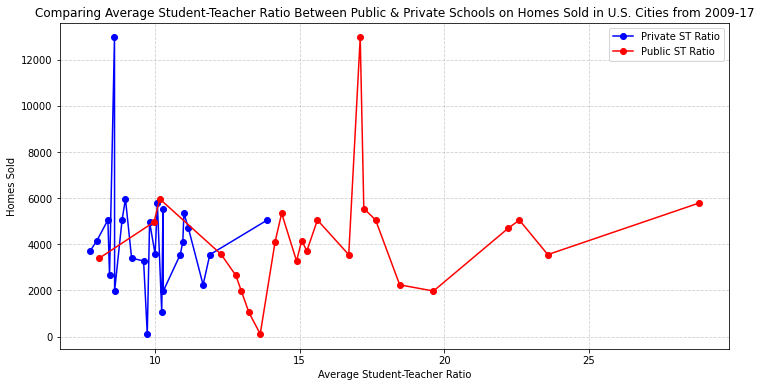

In [122]:
homes_sold = np.array([3553, 5050, 3400, 5968, 4967, 3278, 3568, 1050, 3549, 5785, 4695, 2653, 113, 12964, 5052, 
                       5342, 2243, 5051, 3710, 4107, 4163, 1974, 1975, 5550])

# Sort data by Student-Teacher Ratio before plotting to ensure smooth lines
priv_sorted_indices = np.argsort(priv_st_ratio)
pub_sorted_indices = np.argsort(pub_st_ratio)

# Sort both x (ST_Ratio) and y (Homes Sold) values
priv_st_ratio_sorted = priv_st_ratio[priv_sorted_indices]
pub_st_ratio_sorted = pub_st_ratio[pub_sorted_indices]
homes_sold_priv_sorted = homes_sold[priv_sorted_indices]
homes_sold_pub_sorted = homes_sold[pub_sorted_indices]

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot line for Private School Student-Teacher Ratio vs. Homes Sold (sorted)
ax.plot(priv_st_ratio_sorted, homes_sold_priv_sorted, marker="o", linestyle="-", color="blue", label="Private ST Ratio")

# Plot line for Public School Student-Teacher Ratio vs. Homes Sold (sorted)
ax.plot(pub_st_ratio_sorted, homes_sold_pub_sorted, marker="o", linestyle="-", color="red", label="Public ST Ratio")

# Set labels and title
ax.set_xlabel("Average Student-Teacher Ratio")
ax.set_ylabel("Homes Sold")
ax.set_title("Comparing Average Student-Teacher Ratio Between Public & Private Schools on Homes Sold in U.S. Cities from 2009-17")

# Add grid
ax.grid(True, linestyle="--", alpha=0.6)

# Add legend
ax.legend()

# Save the figure as a PNG file
plt.savefig("homes_sold_vs_student_teacher_ratio.png", dpi=300, bbox_inches="tight", facecolor="white")

# Show plot
plt.show()

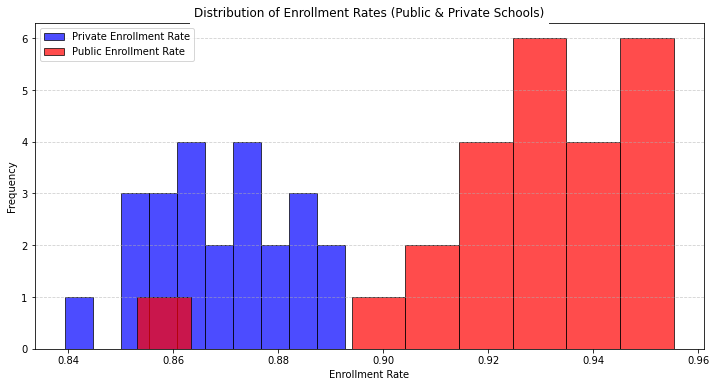

In [124]:
# Create histogram for Enrollment Rate of Public and Private Schools
fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")

# Plot histogram for Private School Enrollment Rate
ax.hist(priv_er, bins=10, alpha=0.7, color="blue", label="Private Enrollment Rate", edgecolor="black")

# Plot histogram for Public School Enrollment Rate
ax.hist(pub_er, bins=10, alpha=0.7, color="red", label="Public Enrollment Rate", edgecolor="black")

# Set labels and title with white background
ax.set_xlabel("Enrollment Rate", backgroundcolor="white")
ax.set_ylabel("Frequency", backgroundcolor="white")
ax.set_title("Distribution of Enrollment Rates (Public & Private Schools)", backgroundcolor="white")

# Add legend
ax.legend()

# Add grid
ax.grid(axis="y", linestyle="--", alpha=0.6)

# Save the histogram with a fully white background
plt.savefig("enrollment_rate_histogram.png", dpi=300, bbox_inches="tight", facecolor="white")

# Show plot
plt.show()